<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# K-Nearest Neighbors

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

*   Use K Nearest neighbors to classify data


In this Lab you will load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point. But what is **K-Nearest Neighbors**?

K-nearest neighbors (KNN) is a simple and intuitive machine learning algorithm used for both `classification` and `regression`tasks.

In KNN, the "K" represents the number of nearest neighbors that are considered for making predictions. Here's a simplified explanation of how KNN works:

**Data Preparation**:

- Collect the dataset that contains **labeled** examples (input data with corresponding output labels).
- Split the dataset into a `training set` and a `test set`. The `training set` is used to build the KNN model, while the test set is used to evaluate its performance.

**Training**:

- During the training phase, KNN simply stores the training data in memory.
- No explicit training or model building step is involved since KNN is a lazy learning algorithm.

**Prediction**:

- To make a prediction for a new, unseen data point: Calculate the distance between the new data point and all the training data points. The most commonly used distance metric is `Euclidean distance`, but other metrics can be used as well.
- Select the K nearest neighbors based on the calculated distances.

>For classification: Count the number of neighbors belonging to each class and assign the majority class as the predicted class for the new data point.<br>

>For regression: Take the average or weighted average of the output labels of the K nearest neighbors as the predicted value for the new data point.

**Evaluation**:

- Evaluate the performance of the KNN model by comparing the `predicted labels or values` with the `true labels or values` from the test set.
- Various evaluation metrics can be used, such as accuracy for classification or mean squared error for regression, to assess the model's effectiveness.

That's the basic concept of K-nearest neighbors! It's a simple algorithm that relies on finding the K nearest neighbors to a new data point and making predictions based on their labels or value

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.


### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#visualization_analysis">Data Visualization and Analysis</a></li>
        <li><a href="https://#classification">Classification</a></li>
    </ol>
</div>
<br>
<hr>


Let's load required libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>


Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


### Load Data 


Let's read the data using pandas library and print the first five rows.


In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.columns.to_list()

['region',
 'tenure',
 'age',
 'marital',
 'address',
 'income',
 'ed',
 'employ',
 'retire',
 'gender',
 'reside',
 'custcat']

In [4]:
df.shape

(1000, 12)

In [5]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


#### Let’s see how many of each class is in our data set


In [6]:
df_cc = df['custcat'].value_counts().to_frame()
df_cc.reset_index(inplace= True)
df_cc.columns = ['Service No', 'Total Customers']
df_cc

,Service No,Total Customers
0,3,281
1,1,266
2,4,236
3,2,217


#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


You can easily explore your data using visualization techniques:


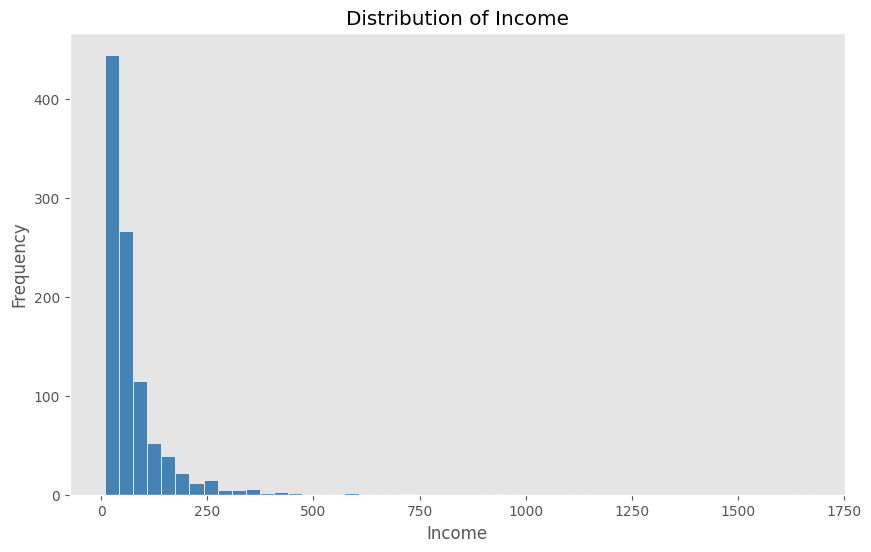

In [7]:
# Set the style of the plot
plt.style.use('ggplot')

# figure size
plt.figure(figsize=(10,6))

# Create the histogram
df['income'].plot(kind = 'hist', bins=50, color='steelblue', edgecolor='white')

# Customize the plot
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(False)

# Show the plot
plt.show()

### Feature set


Let's define feature sets, X:


In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [9]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

`To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array`:


In [10]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

What are our labels?


In [11]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

## Normalize Data


**Data standardization**, also known as **data normalization** or **feature scaling**, is a preprocessing technique commonly used in machine learning and statistical analysis. It involves transforming the data in such a way that it has zero mean and unit variance.This process involves subtracting the mean from each data point and then dividing by the standard deviation.

Let's consider an example to illustrate the concept of data standardization. Suppose we have a dataset that consists of the heights of individuals in centimeters. Here is a small sample of the data:

{160, 165, 170, 155, 175}

To standardize this data, we need to calculate the mean and standard deviation of the heights. The mean (μ) is calculated by summing up all the values and dividing by the number of data points:

μ = (160 + 165 + 170 + 155 + 175) / 5 = 165

The standard deviation (σ) measures the dispersion of the data points around the mean. It is calculated using the following formula:

σ = sqrt(((160 - μ)^2 + (165 - μ)^2 + (170 - μ)^2 + (155 - μ)^2 + (175 - μ)^2) / 5)

After calculating the standard deviation, we can proceed with standardizing the data by subtracting the mean from each data point and dividing by the standard deviation. The standardized values are denoted as z-scores.

Standardized height values:

(160 - μ) / σ = (160 - 165) / σ ≈ -0.79
(165 - μ) / σ = (165 - 165) / σ = 0
(170 - μ) / σ = (170 - 165) / σ ≈ 0.79
(155 - μ) / σ = (155 - 165) / σ ≈ -1.26
(175 - μ) / σ = (175 - 165) / σ ≈ 1.26

As you can see, after standardizing the data, the mean of the standardized values becomes zero, and the standard deviation becomes one. This transformation makes it easier to compare and analyze the data because it removes the scale and makes the data distribution more consistent.

Standardization is particularly useful when dealing with features that have different units or scales. It ensures that all features are on a similar scale, preventing certain features from dominating the analysis due to their larger values. It also helps algorithms that are sensitive to the scale of the features, such as many machine learning algorithms, to work more effectively and produce more reliable results.

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [7]:
# Import the required modules
from sklearn import preprocessing

# Create an instance of the StandardScaler class
scaler = preprocessing.StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data using the scaler
X_transformed = scaler.transform(X.astype(float))

# Store the standardized dataset back into the variable X
X = X_transformed
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

Let's break down the code:

1. We import the necessary module, preprocessing, from scikit-learn.

2. We create an instance of the StandardScaler class and assign it to the variable scaler. This prepares the scaler object for use.

3. We fit the scaler to the data X using the fit() method. This step calculates the mean and standard deviation of each feature in X, which will be used for standardization.

4. We transform the data X using the fitted scaler object by applying the transform() method. This step applies the standardization to the data.

5. We store the standardized dataset back into the variable X by assigning it to X_transformed. This step overwrites the original values in X with the standardized values.

After executing these steps, the variable X will contain the standardized version of the original dataset, where each feature will have a mean of 0 and a standard deviation of 1.

### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.


In [12]:
df.shape

(1000, 12)

In [13]:
from sklearn.model_selection import train_test_split

# split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state= 4)

# number of train and test set
print ('Train set:', X_train.shape[0],  y_train.shape[0])
print ('Test set:', X_test.shape[0],  y_test.shape[0])

Train set: 800 800
Test set: 200 200


<div id="classification">
    <h2>Classification</h2>
</div>


<h3>K nearest neighbor (KNN)</h3>


#### Import library


Classifier implementing the k-nearest neighbors vote.


In [14]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Let's start the algorithm with k=4 for now:


In [15]:
# Define the value of k
k = 4

# Create an instance of the KNeighborsClassifier class
neigh = KNeighborsClassifier(n_neighbors=k)

# Train the classifier using the fit() method
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### Predicting

We can use the model to make predictions on the test set:


In [16]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 3, 4, 4], dtype=int64)

In [17]:
y_test[0:5]

array([4, 1, 1, 2, 4], dtype=int64)

### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the `jaccard_score` function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

The `metrics.accuracy_score` function from scikit-learn calculates the accuracy of a classification model by comparing the predicted labels with the true labels. It provides a measure of how well the classifier performs in terms of the proportion of correctly classified samples.


In [18]:
from sklearn import metrics

# Calculate and print the accuracy on the training set
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))

# Calculate and print the accuracy on the test set
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.5575
Test set Accuracy:  0.26


The accuracy score represents the proportion of correctly classified samples in the dataset. Higher accuracy values indicate better performance of the classifier. By printing these accuracy scores, you can assess the performance of the trained KNN classifier on both the training and test sets.

## Practice

Can you build the model again, but this time with k=6?


In [24]:
# Define the value of k
k = 6

# Create an instance of the KNeighborsClassifier class
neigh6 = KNeighborsClassifier(n_neighbors=k)

# Train the classifier using the fit() method
neigh6.fit(X_train, y_train)

# Prediction
yhat6 = neigh6.predict(X_test)
yhat6[0:5]

array([4, 4, 1, 3, 4], dtype=int64)

In [25]:
# Calculate and print the accuracy on the training set
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))

# Calculate and print the accuracy on the test set
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.495
Test set Accuracy:  0.29


#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


In [26]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.29 , 0.345, 0.33 , 0.32 ])

In [37]:
std_acc

array([0.03157333, 0.03270321, 0.03157333, 0.03101612, 0.0324037 ,
       0.03208582, 0.03361361, 0.03324906, 0.03298485])

The code snippet calculates the mean accuracy for different values of K in a K-Nearest Neighbors (KNN) classification model. Here's a breakdown of what each part does:

1. `Ks = 10`: This line sets the maximum number of neighbors (K) to consider. In this case, it is set to 10.

2. `mean_acc = np.zeros((Ks-1))`: This line creates an array of zeros with a length of `Ks-1`. The `mean_acc` array will store the mean accuracy values for different values of K.

3. `std_acc = np.zeros((Ks-1))`: This line creates another array of zeros with a length of `Ks-1`. The `std_acc` array will store the standard deviation of accuracy values for different values of K.

4. The loop `for n in range(1, Ks)`: iterates from `1` to `Ks-1`. This loop is used to train the KNN model and calculate the mean accuracy for each value of K.

5. Inside the loop, `neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)` creates a KNN classifier object with the current value of `K, n_neighbors = n`. It then fits the model using the training data `X_train` and corresponding labels `y_train`.

6. `yhat = neigh.predict(X_test)` predicts the labels for the test data `X_test` using the trained model.

7. `mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)` calculates the accuracy score between the predicted labels `yhat` and the true labels `y_test` and stores it in the `mean_acc` array at index `n-1`.

8. `std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])` calculates the standard deviation of the accuracy values and stores it in the `std_acc` array at index `n-1`.

9. Finally, after the loop, `mean_acc` is printed, which will display the mean accuracy values for different values of K.

The line `std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])` calculates the standard error of the accuracy values for each value of K in the KNN model.

Let's break down this line:

- `yhat == y_test` compares the predicted labels `yhat `with the true labels `y_test`. This will create an array of Boolean values where `True` indicates a correct prediction and `False` indicates an incorrect prediction.

- `np.std(yhat == y_test)` calculates the standard deviation of the Boolean array. Since True is treated as 1 and False as 0 in numpy, the resulting standard deviation will represent the standard error of the accuracy.

- `np.sqrt(yhat.shape[0])` calculates the square root of the number of predictions `(yhat.shape[0])`. This is used to normalize the standard deviation.

- The calculated standard deviation is divided by the square root of the number of predictions to get the standard error.

- The resulting standard error is assigned to `std_acc[n-1]`, which stores the standard errors for different values of K in the std_acc array.

#### Plot the model accuracy for a different number of neighbors.


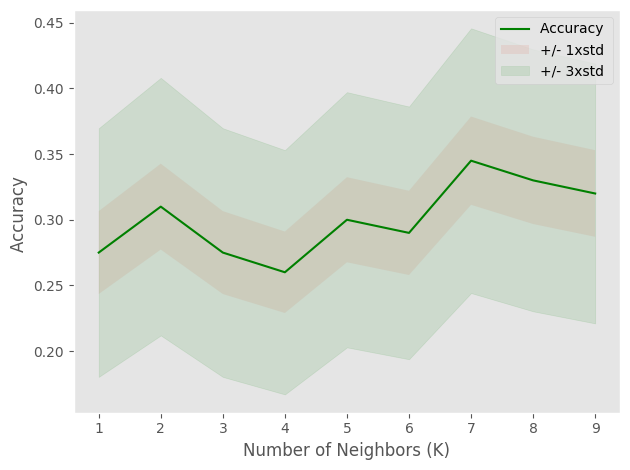

In [36]:
plt.plot(range(1,Ks), mean_acc,'g')

plt.fill_between(range(1,Ks),
                 mean_acc + 1 * std_acc,
                 mean_acc - 1 * std_acc,
                 alpha=0.10)

plt.fill_between(range(1,Ks),
                 mean_acc - 3 * std_acc,
                 mean_acc + 3 * std_acc,
                 alpha=0.10,
                 color="green")

plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')

plt.grid(False)
plt.tight_layout()
plt.show()

In [38]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.345 with k= 7


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>


       |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
